<a href="https://colab.research.google.com/github/Cyp202/2025_Intro_Python/blob/main/notebook/W2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Replicating plots

Hint: For this entire notebook, rather than directly filling out the entire code snippet in one go, we recommend copy-pasting hints line-by-line to progressively replicate the target figure. That way, you can learn by trial-and-error.

**To add a new cell above, press "Escape" and type 'a'**

**To add a new cell below, press "Escape" and type 'b'**

**To delete a cell, press Ctrl-M + D**

## Exercise 1: Replicating Plots using `Matplotlib` and `Numpy`

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. There is no need to focus on how this code exactly works. In the end, it will give you some `numpy` arrays, which you will use in your plots.

This exercise should be done using **only `numpy` and `matplotlib`**.

### Part I: Line and Contour Plots to Visualize Global Temperature Data
The temperature data are from the [NCEP/NCAR atmospheric reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html).

In [1]:
! pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.2 MB/s eta 0:00:00


In [2]:
# We'll need to load the data from the UNIL sharepoint using pooch, so let's
# import the library
import pooch
import numpy as np
import matplotlib.pyplot as plt

# In order to keep our code concise and readable, we'll use a variable that
# stores the common part of the URL where the data is hosted. Then, we'll store
# the full URL for each file in its own variable
base_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/'
lon_url =  f'{base_url}EQtSkmHdXlZAuZcDljeHXuMBIVGfXP4lkR56RX6vuCDh1Q?download=1'
lat_url =  f'{base_url}EbMAwn26etZPjxw4F3akRt8BmPef3PMQPn751e6tF0Xi-Q?download=1'
temp_url = f'{base_url}EfUOMGrJNtVMgJUtfP9137sB9d64M_osBRPa0iQRSCHKGg?download=1'

# Let's go ahead and cache each file
lon_filename  = pooch.retrieve(lon_url,
                               known_hash='eaf54b88dd89279d3034da17fe8470dc2c841bf9fa89b2aa741dacff9c326cdb'
                               )

lat_filename  = pooch.retrieve(lat_url,
                               known_hash='af1f438080460e1fca4583b2ec19b44285a3d3776e4d21b8da9b6e162906c88a'
                               )
temp_filename = pooch.retrieve(temp_url,
                               known_hash='e040ca257334708b43e86398e09a5669fcf051179ecf5dcd278f758d67beed20'
                               )

# And then load each file into a numpy array. You can now use these variables
# to continue with the exercise :)
lon = np.load(lon_filename)
lat = np.load(lat_filename)
temp = np.load(temp_filename)

Below is the figure to replicate using the `numpy` variables `temp`, `lon`, and `lat`.

Hint 1: Zonal-mean is synonymous with longitudinal-mean, i.e. the mean must be taken along the `axis` corresponding to `lon`.

Hint 2: To create subplots of different sizes, consider reading the [`plt.subplots` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

Hint 3: For the left subplot, check out the [2D Plotting Methods section](#2D_Plotting_Methods).

Hint 4: For the right subplot, check out the [Label, Ticks, and Gridlines subsection](#Label).

Hint 5: Don't spend too too much time making your figure perfect as there is still a lot of ground to cover in the next notebooks 😀

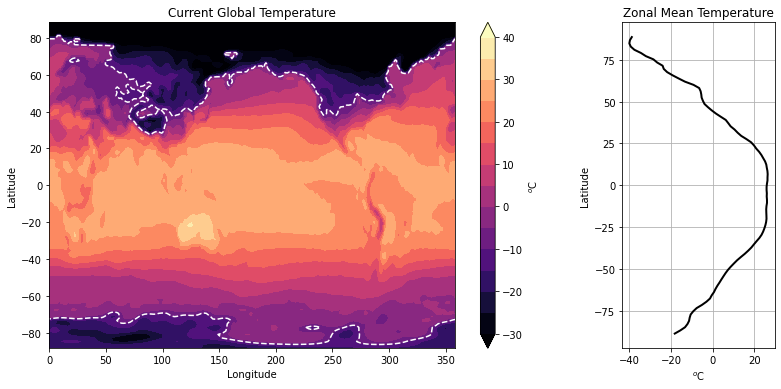

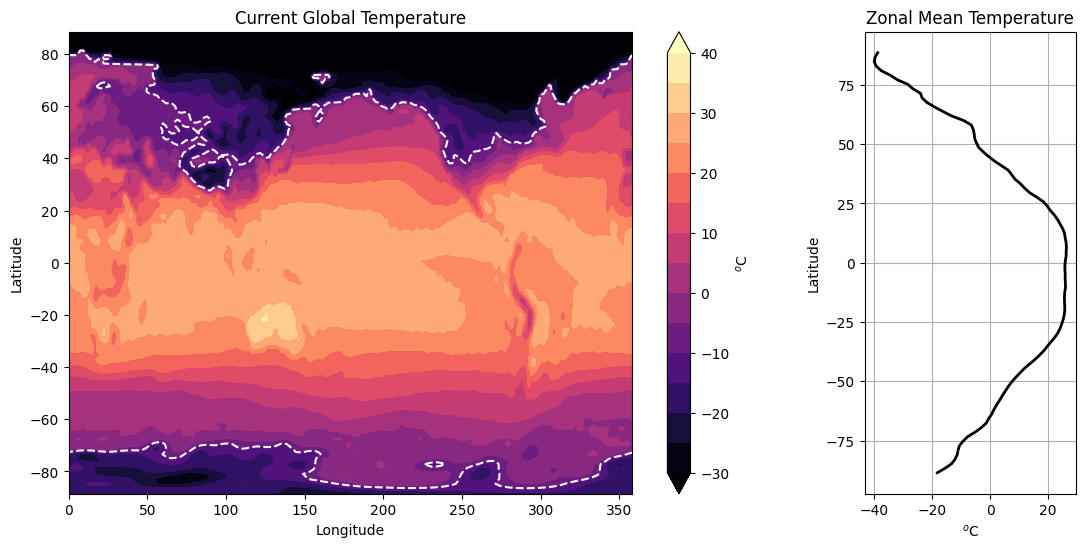

In [4]:
# Replicate this figure
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15

# create figure with 1 row, 2 columns, set subplot width ratios and figure size (figsize=(13,6) -> inside put whathever number)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,6),gridspec_kw={'width_ratios': [5, 1.5]}) #fig= objet blanc pr l'instant
#contourf -> the f is for filled : we don't want just the outside of the lines, specify colormap, contour levels, extend both ends
ctemp = ax1.contourf(lon,lat,temp-273.15,cmap='magma',levels=np.linspace(-30,40,15),extend='both') #plot of temperature in Celsius
# contour plot of temperature in Celsius, specify color, contour levels, extend both ends
ax1.contour(lon,lat,temp-273.15,colors='w',levels=[-10],extend='both')
# set axis label
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
# set subplot title
ax1.set_title('Current Global Temperature')
# add colorbar for contour plot, link to ax1, label in °C
fig.colorbar(ctemp,ax=ax1,label='$^o$C')

# plot zonal (longitudinal) mean temperature, line width 2, black color
ax2.plot(np.mean(temp-273.15,axis=1),lat,lw=2,c='k')
# set axis label
ax2.set_xlabel(r'$^{o}$C')
ax2.set_ylabel(r'Latitude')
# set subplot title
ax2.set_title('Zonal Mean Temperature')
plt.grid() # add the grid of the subplot
#plt.tight_layout()  # automatically adjust subplot spacing
plt.show() # display the figure


### Part II: Scatter Plots to Visualize Earthquake Data
Here, we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by `log10(depth)` and adjust the marker size to be `magnitude`

In [5]:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg' to '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg.unzip'


Below is the figure to replicate using the `numpy` variables `earthquake`, `depth`, `magnitude`, `latitude`, and `longitude`.

Hint: Check out the [Scatter Plots subsection](#Scatter) and consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).

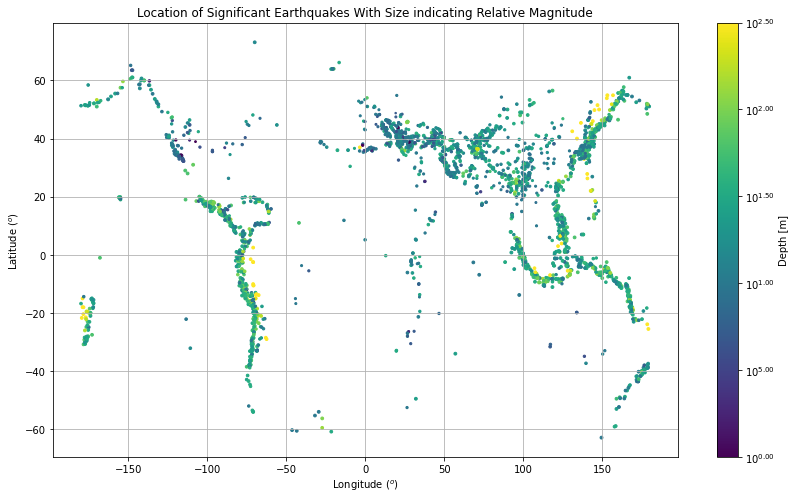

In [6]:
# This is the function to the set the ticks in the colorbar to be in scientific notations.
# You can directly use this function and don't need to change anything in this cell.
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(a)

In [7]:
print("lat shape:", lat.shape)
print("lon shape:", lon.shape)
print("latitude shape:", latitude.shape)
print("longitude shape:", longitude.shape)

lat shape: (94,)
lon shape: (192,)
latitude shape: (5959,)
longitude shape: (5959,)


/tmp/ipython-input-1458162110.py:6: RuntimeWarning: divide by zero encountered in log10
  ctemp = ax1.scatter(longitude,latitude,s= magnitude ,c=np.log10(depth),marker='o',cmap='viridis',vmin=0,vmax=2.5)


Text(0.5, 1.0, 'Location of Significant Earthquakes With size indicating the Relative Magnitude')

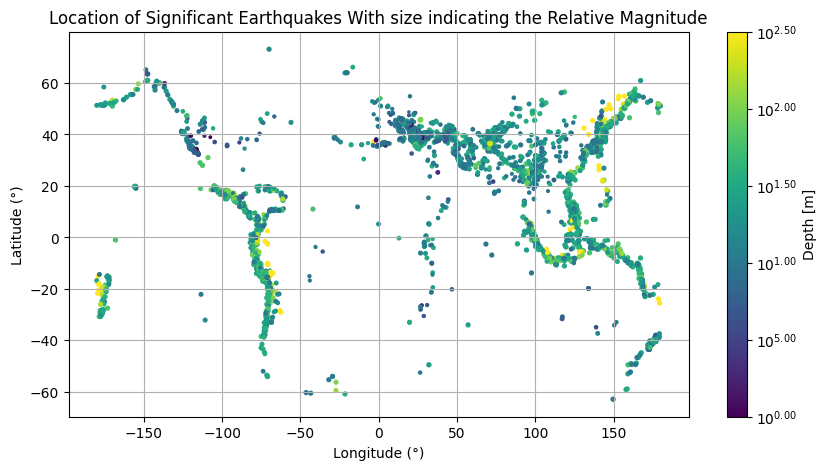

In [8]:
# Replicate the figure here

# create figure with 1 row, 1 columns, set subplot width ratios and figure size (figsize=(13,6) -> inside put whathever number)
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,5)) #fig= objet blanc pr l'instant
#scatter point
ctemp = ax1.scatter(longitude,latitude,s= magnitude ,c=np.log10(depth),marker='o',cmap='viridis',vmin=0,vmax=2.5)
# set axis label
ax1.set_xlabel('Longitude (°)')
ax1.set_ylabel('Latitude (°)')
plt.grid()
# add colorbar for contour plot, link to ax1, label in °C
fig.colorbar(ctemp,ax=ax1,label='Depth [m]',format=ticker.FuncFormatter(fmt))
# set plot title
ax1.set_title('Location of Significant Earthquakes With size indicating the Relative Magnitude')


## Exercise 2: Cartopy

The goal of this exercise (congratulations for making it that far!! 😃) is to replicate the figures you see as closely as possible.

### Part I: Antarctic Sea Ice

**Q1) Download the file below and use it to plot the concentration of Antarctic Sea Ice.**

Try to recreate the plot below.

Hint: Explore the file contents in order to determine the correct projection.

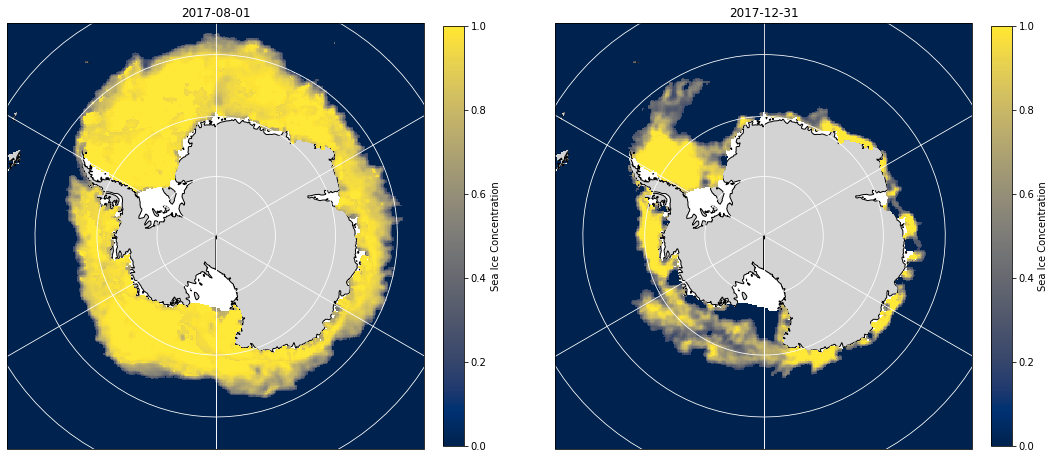

In [9]:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shapely: filename=Shapely-1.6.4-py2.py3-none-any.whl size=155973 sha256=1791a28922b19d0857218685c68d2aee0ef3e3b24a7cbc78d95945cb0c755c07
  Stored in directory: /root/.cache/pip/wheels/04/48/f8/49eb7815e85eaf1ec42a8acdf38f1266b27eaedbcf527db25d
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.23.0 requires shapely>=1.8.5, but you have shapely 1.6.4 which is incompatible.
libpysal 4.13.0 requires shapely>=2.0.1, but you have shapely 1.6.4 which is incompatible.
geopandas 1.1.1 requires shapely>=2.0.0, but you have shapely 1.6.4 which

In [10]:
import pooch
import cartopy
import cartopy.crs as ccrs
#import xarray as xr
from netCDF4 import Dataset
######################################################################################################################################################
# Download Sea Ice files
url1 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EREWA38Rs-FFslQd4yKZBAsBF8m9yLzeJKEAN5gSz7LLFw?download=1"
fname1 = pooch.retrieve(url1, known_hash='1ff50bca1e6249a9b2fcd9d9466e31bdb5be650243f99c7319ab2ce625b87ce7')
url2 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/Ea_2umrDTkhCrN--th4nuokBMcnVlxGshiyUq2eSpvhlTQ?download=1"
fname2 = pooch.retrieve(url2, known_hash='309418969ad09f42b8104589bcb86de4ed353a5742fef9385baec174c7d55e66')
######################################################################################################################################################
# Run these as is. We are reading the sea ice concentration values from our files
seaice1,seaice2 = Dataset(fname1,'r'),Dataset(fname2,'r')
var_toplot1,var_toplot2 = seaice1.variables['seaice_conc_cdr'][:],seaice2.variables['seaice_conc_cdr'][:]

In [11]:
# List of variables in file
print(seaice1.variables.keys())
# List of variables in file
print(seaice1.dimensions.keys())
# Directly view the contents of the ‘projection’ variable.
print(seaice1.variables['projection'])

#
from matplotlib import colormaps
list(colormaps);


dict_keys(['projection', 'seaice_conc_cdr', 'stdev_of_seaice_conc_cdr', 'melt_onset_day_seaice_conc_cdr', 'qa_of_seaice_conc_cdr', 'goddard_merged_seaice_conc', 'goddard_nt_seaice_conc', 'goddard_bt_seaice_conc', 'time', 'ygrid', 'xgrid', 'latitude', 'longitude'])
dict_keys(['xgrid', 'ygrid', 'time'])
<class 'netCDF4.Variable'>
|S1 projection()
    grid_boundary_top_projected_y: 4350000.0
    grid_boundary_bottom_projected_y: -3950000.0
    grid_boundary_right_projected_x: 3950000.0
    grid_boundary_left_projected_x: -3950000.0
    parent_grid_cell_row_subset_start: 0.0
    parent_grid_cell_row_subset_end: 332.0
    parent_grid_cell_column_subset_start: 0.0
    parent_grid_cell_column_subset_end: 316.0
    spatial_ref: PROJCS["NSIDC Sea Ice Polar Stereographic South",GEOGCS["Unspecified datum based upon the Hughes 1980 ellipsoid",DATUM["Not_specified_based_on_Hughes_1980_ellipsoid",SPHEROID["Hughes 1980",6378273,298.279411123061,AUTHORITY["EPSG","7058"]],AUTHORITY["EPSG","6054"]],PRIM

In [12]:
print("var_toplot1 shape:", var_toplot1.shape)
print("var_toplot2 shape:", var_toplot2.shape)

var_toplot1 shape: (1, 332, 316)
var_toplot2 shape: (1, 332, 316)


var_toplot1 shape: (1, 332, 316)
var_toplot2 shape: (1, 332, 316)


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


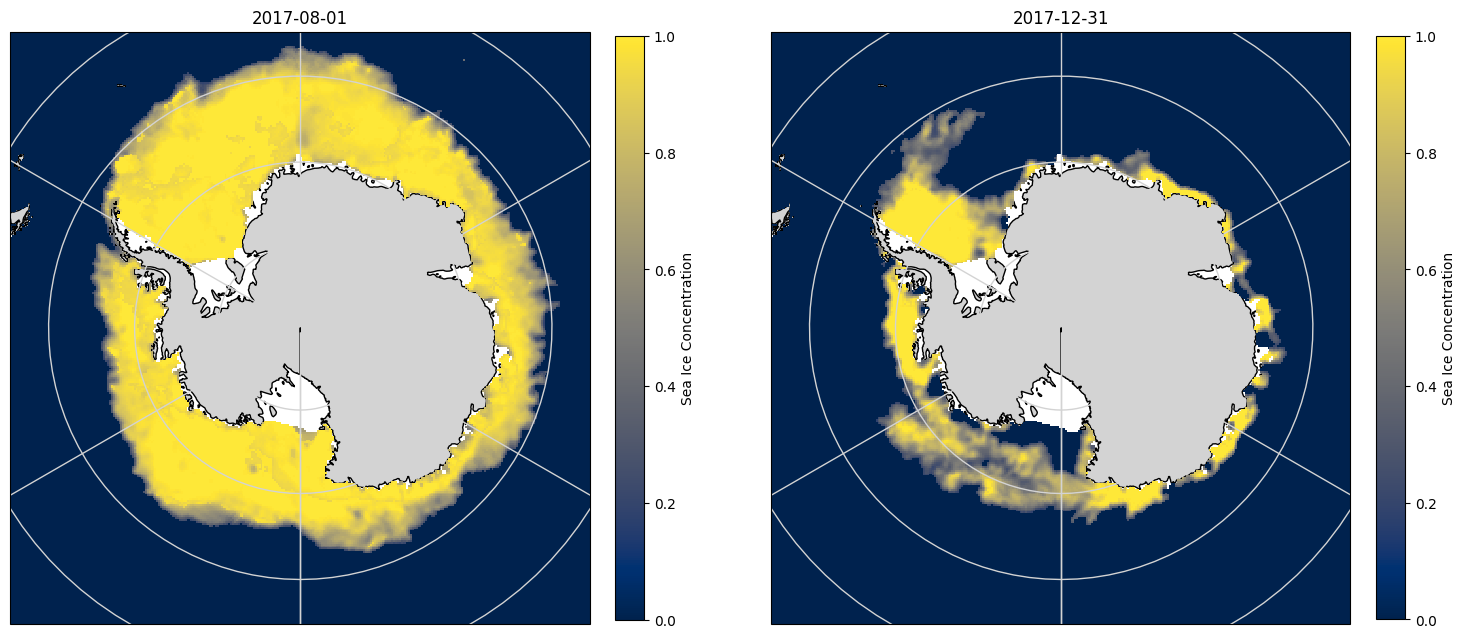

In [13]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np

# Creatin of a figure with polar projection
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change: -> set map limits in geographic coordinates
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())


######################################################################################################################################################
# Add Land and gridlines
# Hint: Check edgecolor to show coast, and facecolor to color the continent
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################

# add land with black border and gray fill
ax[0].add_feature(cartopy.feature.LAND, edgecolor='black',facecolor='lightgray')

# add gridlines with specified line width and color
ax[0].gridlines(lw=1,color='lightgray')

######################################################################################################################################################
# Add Contours
# Hint: X (Y) data in the pcolormesh should be the longitude and latitude of the sea ice data.
# Hint: Check the shape of the var_toplot1, var_toplot2 before plotting
# Hint: longitude and latitude can be accessed with seaice1.variables['longitude'][:], seaice1.variables['latitude'][:]
# Hint: Check this website: https://matplotlib.org/stable/tutorials/colors/colormaps.html for available colormaps
######################################################################################################################################################
# check shape of first sea ice array (time, y, x)
print("var_toplot1 shape:", var_toplot1.shape) #(1, 332, 316)
# check shape of second sea ice array (time, y, x)
print("var_toplot2 shape:", var_toplot2.shape) #(1, 332, 316)

# axis x = longitude = seaice1.variables['longitude'][:],
# axis y = latitude = seaice1.variables['latitude'][:]
# np.ma.masked_greater(x, value)-> output a version “masked” of table x, inside wich all element > value are ignored
#transform=ccrs.PlateCarree(),  # input data are in longitude/latitude -> PlateCarree (lat/lon)
# vmin=0,vmax=1,  # color limits
# cmap="magma"-> colormap : look in the website and choose one that look alike the picture given -> Sequential colormap

left = ax[0].pcolormesh(seaice1.variables['longitude'][:], seaice1.variables['latitude'][:], np.ma.masked_greater(var_toplot1[0],1), transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap="cividis")

# pad=0.04,->  pad in plt.colorbar() set the distance btw colorbar and graph
plt.colorbar(left,ax=ax[0],fraction=0.046, pad=0.04,label='Sea Ice Concentration')
# add title
ax[0].set_title('2017-08-01')


# set the born in longitude and latitude of the map
ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())  # set map extent for second subplot
#cartopy.feature.LAND → add continents.
#edgecolor='black' → add black edge at continents
#facecolor='lightgray' → fill with gray.
ax[1].add_feature(cartopy.feature.LAND, edgecolor='black',facecolor='lightgray')  # add land with edges
ax[1].gridlines(lw=1,color='lightgray')  # add gridlines

right= ax[1].pcolormesh(seaice2.variables['longitude'][:],seaice2.variables['latitude'][:],
    np.ma.masked_greater(var_toplot2[0],1),  # mask values >1
    transform=ccrs.PlateCarree(),  # input data CRS
    vmin=0,vmax=1,  # color range
    cmap="cividis"  # colormap
)
plt.colorbar(right,ax=ax[1],label='Sea Ice Concentration',fraction=0.046, pad=0.04)  # add colorbar
ax[1].set_title('2017-12-31')  # set title for second subplot
plt.show()  # render figure


### Part II: 2014 Earthquakes
**Q2) Download the file below and use it to plot the location of >4 Richter Scale earthquakes in the US during 2014.**

Hint: Explore the file contents in order to determine the correct projection.

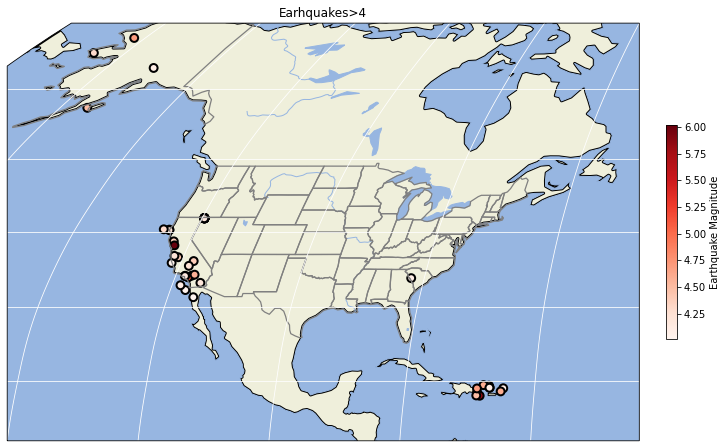

In [14]:
import pandas as pd
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Ea9h1j2_wYpEtuX5waZZWpsBt2zh3lvGUBFisvA8dFG5Eg?download=1",
    known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')
usgs_2014 = pd.read_csv(fname)

In [15]:
######################################################################################################################################################
# Run these as is. We are removing missing values in the data and filter data points with stronger earthquakes (magnitude > 4)
usgs_2014_nonan = usgs_2014.dropna()
usgs_2014_large = usgs_2014_nonan[usgs_2014_nonan['mag']>4]

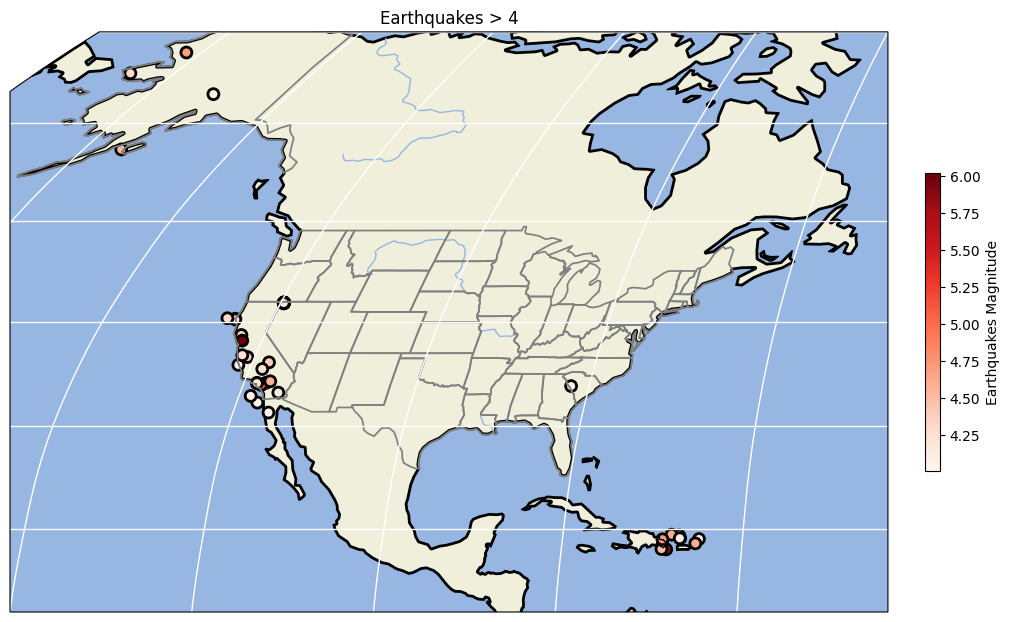

In [27]:
fig,ax = plt.subplots(1,1,figsize=(12, 12),subplot_kw={'projection': ccrs.Robinson()})
# The rest doesn't change:
ax.set_extent([-140, -60, 12,70], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land, Ocean, Rivers, and State Lines
# Hint: Land linewidth = 3; States: edgecolor='gray',linewidth=1.25; lakes/ocean/rivers: no change
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax.add_feature(cartopy.feature.LAND, edgecolor='black',linewidths=3) # linewidths=l’épaisseur d’une ligne.
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES,edgecolor='gray',linewidth=1.25)
ax.gridlines(lw=1,color='w')

######################################################################################################################################################
# Add Scatter points for earthquake data
# Hint: usgs_2014_large['longitude'] to access logitude data, usgs_2014_large['latitude'] to access latitude data, usgs_2014_large['mag'] to access Earthquake magnitudes
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
earthquakes = ax.scatter(usgs_2014_large['longitude'],usgs_2014_large['latitude'],s=62,c=usgs_2014_large['mag'],marker='o',cmap='Reds',edgecolors='black',linewidths=2, transform=ccrs.PlateCarree())
#c est la valeur à utiliser pour colorer chaque point.
#cmap est la colormap utilisée pour convertir les valeurs numériques de c en couleurs.
plt.colorbar(earthquakes,ax=ax,fraction=0.016, pad=0.04,label='Earthquakes Magnitude')
ax.set_title('Earthquakes > 4')
plt.show()
